In [5]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path
%matplotlib inline
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims

In [6]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/'

In [7]:
#make synapse results dictionary

spots={"filename":[]}

path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    if filelist[i].endswith(".txt"): 
        if ("rerun" in str(filelist[i]))==True:
            if ("output_classification" in str(filelist[i]))==True:
                #if (protein in str(filelist[i]))==True:
                     if ("backup" in str(filelist[i]))==False:
                        #if str(filelist[i][:-12]) not in str(spots["filename"]):
                            spots["filename"].append(filelist[i])


synapses_results={"spots classification filename":[],
                "sted spot":[],
                "homer spot":[],
                "phalloidin spot":[],
                  "presynapse spot":[],
                "sted spot aligned":[],
                  "sted spot aligned filename":[],
                "homer spot aligned":[],
                   "homer spot aligned filename":[],
                  "presynapse spot aligned":[],
                   "presynapse spot aligned filename":[],
                "phalloidin spot aligned":[],
                 "phalloidin spot aligned filename":[],
                 "classification":[],
                  "protein sted, bg subtracted":[],
                  "homer confocal, bg subtracted":[],
                  "presynapse sted, bg subtracted":[],
                 "phalloidin confocal, bg subtracted":[]}

num=0
for spot in range(0,len(spots["filename"])):
    num+=1
    print(spots["filename"][spot])
    
    firstpart='/'.join(spots["filename"][spot].split("/")[:-1])
    lastpart=spots["filename"][spot].split("classification")[-1]
    synapses_results["spots classification filename"].append(spots["filename"][spot])
    synapses_results["classification"].append(np.loadtxt(spots["filename"][spot]))
    
    file2read=firstpart+'/output_sted_'+lastpart
    synapses_results["sted spot"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_homer_'+lastpart
    synapses_results["homer spot"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_dio_'+lastpart
    synapses_results["phalloidin spot"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_synapse_'+lastpart
    synapses_results["presynapse spot"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    
    file2read=firstpart+'/output_sted_aligned_'+lastpart
    synapses_results["sted spot aligned filename"].append(file2read)
    synapses_results["sted spot aligned"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    
    file2read=firstpart+'/output_homer_aligned_'+lastpart
    synapses_results["homer spot aligned"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    synapses_results["homer spot aligned filename"].append(file2read)
    
    file2read=firstpart+'/output_synapse_aligned_'+lastpart
    synapses_results["presynapse spot aligned"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    synapses_results["presynapse spot aligned filename"].append(file2read)
    
    file2read=firstpart+'/output_dio_aligned_'+lastpart
    synapses_results["phalloidin spot aligned"].append(np.asarray(np.loadtxt(file2read,delimiter=','))) 
    synapses_results["phalloidin spot aligned filename"].append(file2read)
    
    synapses_results["protein sted, bg subtracted"].append(np.nan)
    synapses_results["homer confocal, bg subtracted"].append(np.nan)
    synapses_results["phalloidin confocal, bg subtracted"].append(np.nan)
    synapses_results["presynapse sted, bg subtracted"].append(np.nan)

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification1_10_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification4_13_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification5_14_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification6_16_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification8_18_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification12_23_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification127_84_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification128_85_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification129_86_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification132_89_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification137_96_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification140_9_rerun.txt
/Volumes/ukps-all$/user/tdank

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification235_113_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification236_114_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification237_115_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification238_116_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification239_117_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification240_118_rerun.txt
/Volumes/ukps-all$/use

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification359_24_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification361_26_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification364_29_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification373_38_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification376_40_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification378_42_rerun.txt
/Volumes/ukps-all$/user/tdan

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification605_49_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification610_54_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification624_73_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification635_84_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification637_86_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification640_90_rerun.txt
/Volumes/ukps-all$/user/tdan

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification56_68_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification57_69_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification63_74_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification65_76_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification66_79_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification67_7_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN1

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification198_96_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification200_98_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification201_99_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification204_14_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification205_15_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification207_17_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification309_46_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification310_47_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification311_48_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification314_50_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification318_54_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification319_55_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification436_7_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification438_82_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification439_83_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification442_86_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification443_87_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification452_96_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification613_44_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification615_46_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification617_48_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification619_4_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification620_50_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification624_54_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification736_78_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification737_79_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification738_7_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification739_80_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification1_18_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification3_23_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/A

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification126_82_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification129_85_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification133_89_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification135_91_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification139_95_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification154_28_rerun.txt
/Volumes/ukps-all$/user/tdan

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification271_84_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification274_87_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification282_95_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification284_97_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification285_98_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification286_100_rerun.txt
/Volumes/ukps-all$/user/tda

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification13_111_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification19_117_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification23_120_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification24_121_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification26_13_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification27_15_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification137_129_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification141_133_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification142_136_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification143_137_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification144_138_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification145_139_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All 

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification259_115_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification264_16_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification273_27_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification281_35_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification282_36_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification284_38_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification462_81_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification464_85_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification467_8_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification469_92_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification471_94_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification472_95_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification81_4_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification87_56_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification89_5_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification90_61_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification91_62_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification98_6_rerun.txt
/Volumes/ukps-all$/user/t

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification238_101_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification240_104_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification241_105_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification242_106_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification244_108_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification245_109_rerun.txt
/Volumes/u

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification341_55_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification342_56_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification344_58_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification345_59_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification348_62_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification350_64_rerun.txt
/Volumes/ukps-al

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification457_181_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification458_182_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification459_20_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification460_21_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification461_22_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification462_23_rerun.txt
/Volumes/ukps-

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification573_146_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification575_148_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification581_153_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification583_157_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification584_158_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification587_160_rerun.txt
/Volumes/u

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification708_103_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification709_104_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification722_116_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification723_117_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification724_118_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification726_12_rerun.txt
/Volumes/uk

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification65_49_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification67_51_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification69_53_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification70_54_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification71_56_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification74_59_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All 

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification260_21_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification261_22_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification264_26_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification265_28_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification267_30_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification271_34_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clar

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification360_36_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification361_37_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification362_38_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification363_39_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification365_41_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification366_42_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clar

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification449_53_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification450_54_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification451_55_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification452_56_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification457_61_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification458_62_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clar

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification89_103_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification95_110_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification96_111_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification98_113_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification99_114_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification108_128_rerun.txt
/Volumes/ukps-a

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification256_112_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification257_113_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification260_116_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification261_117_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification262_118_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification263_119_rerun.txt
/Volumes/u

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification369_107_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification372_110_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification374_112_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification381_11_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification382_120_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification383_121_rerun.txt
/Volumes/uk

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification486_84_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification487_85_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification489_87_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification490_88_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification491_89_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N4_HPN17DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification492_8_rerun.txt
/Volumes/ukps-all

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification111_24_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification112_25_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification114_27_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification117_30_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification120_33_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification123_36_rerun.txt
/Volumes/ukps-all$/user/tdan

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification269_43_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification270_44_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification273_48_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification275_50_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification277_52_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification279_54_rerun.txt
/Volumes/ukps-all$/user/tdan

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification71_159_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification73_160_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification81_168_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification82_169_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification83_16_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification84_170_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification220_71_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification221_72_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification222_74_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification225_78_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification227_80_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification228_81_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification389_141_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification393_145_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification395_147_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification397_14_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification398_150_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification400_152_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All f

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification492_98_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification493_99_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification494_9_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification497_14_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification498_15_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification500_17_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification102_25_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification105_28_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification111_34_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification114_37_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification118_41_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification119_42_rerun.txt
/Volumes/ukps-all$/user/tdan

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification289_42_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification290_43_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification294_47_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification295_48_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification297_50_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification298_51_rerun.txt
/Volumes/ukps-all$/user/tdan

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification142_145_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification147_26_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification158_39_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification161_43_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification164_46_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification181_63_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification399_36_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification403_41_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification404_42_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification406_44_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification408_46_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification409_47_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification96_32_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification103_42_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification105_45_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification108_50_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification112_54_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification113_55_rerun.txt
/Volumes/ukps-all

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification215_66_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification218_69_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification219_6_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification221_71_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification222_72_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification227_77_rerun.txt
/Volumes/ukps-all

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification392_148_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification400_155_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification407_162_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification408_163_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification421_175_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification424_178_rerun.txt
/Volumes/u

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification76_116_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification88_19_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification99_35_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification102_38_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification106_43_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification111_50_rerun.txt
/Volumes/ukps-all$

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification238_22_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification241_25_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification243_27_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification251_35_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification259_43_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification263_47_rerun.txt
/Volumes/ukps-al

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification423_94_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification427_98_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification428_99_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification4_13_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification5_14_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification6_16_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_C

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification140_7_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification141_80_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification143_82_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification144_83_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification149_89_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification152_91_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification417_76_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification419_78_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification434_93_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification1_100_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification3_102_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification21_120_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Col

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification225_76_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification227_78_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification229_80_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification231_82_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification234_85_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification243_94_rerun.txt
/Volumes/ukps-all$/user/tdan

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification413_53_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification419_59_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification420_60_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification427_67_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification428_68_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification438_78_rerun.txt
/Volumes/ukps-all$/user/tdan

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification575_224_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification576_225_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification578_34_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification580_36_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification582_38_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification583_39_rerun.txt
/Volumes/ukps-all$/user/td

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification749_79_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification761_93_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification764_96_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification770_102_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification776_109_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification777_110_rerun.txt
/Volumes/ukps-all$/user/t

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification1097_194_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification1099_196_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification1101_198_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification1104_201_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification1107_204_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Calreticulin/output_classification1111_208_rerun.txt
/Volumes/ukps-al

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification67_6_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification69_72_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification72_75_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification73_76_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification74_77_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification76_79_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN1

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification260_57_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification261_58_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification263_5_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification265_61_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification266_62_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification267_63_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification569_49_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification571_51_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification573_56_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification579_62_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification590_73_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification592_75_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification745_61_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification746_63_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification747_64_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification758_78_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification759_80_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/ERGIC/output_classification760_81_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification28_128_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification29_129_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification31_131_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification32_132_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification33_133_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification36_136_rerun.txt
/Volumes/ukps-all$/user/tdan

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification353_12_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification373_32_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification384_43_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification387_46_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification401_59_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification410_67_rerun.txt
/Volumes/ukps-all$/user/tdan

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification553_95_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification556_98_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification557_99_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification563_105_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification565_107_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification575_11_rerun.txt
/Volumes/ukps-all$/user/td

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification837_103_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification839_105_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification842_110_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification847_115_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification853_120_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/Synaptopodin/output_classification863_131_rerun.txt
/Volumes/ukps-all$/use

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification102_19_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification104_21_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification107_24_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification110_27_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification111_28_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification112_29_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification230_68_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification231_69_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification233_70_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification238_75_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification239_76_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/SYT1/TGN38/output_classification241_78_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification12_110_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification16_114_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification17_115_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification18_117_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification23_123_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification24_124_rerun.txt
/Volumes/ukps-al

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification195_117_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification196_118_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification203_124_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification204_125_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification205_12_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification230_41_rerun.txt
/Volumes/ukp

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification449_63_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification452_66_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification455_69_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification458_72_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification465_79_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Calreticulin/output_classification466_80_rerun.txt
/Volumes/ukps-al

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification22_124_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification26_128_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification30_132_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification37_139_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification38_140_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification39_141_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clar

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification172_97_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification173_98_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification184_111_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification185_112_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification187_114_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification197_123_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification339_122_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification344_127_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification345_128_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification346_129_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification350_132_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification351_133_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/202

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification484_45_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification485_46_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification487_48_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification489_50_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification493_57_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification494_58_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clar

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification640_230_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification643_233_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification644_234_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification650_240_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification651_34_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/ERGIC/output_classification658_42_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification76_48_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification84_56_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification88_63_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification92_70_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification94_72_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification97_75_rerun.txt
/Volumes/ukps-all$/use

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification205_185_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification206_186_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification207_187_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification210_190_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification212_192_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification213_193_rerun.txt
/Volumes/u

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification324_101_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification330_107_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification331_108_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification332_109_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification333_10_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification335_111_rerun.txt
/Volumes/uk

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification481_52_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification485_56_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification493_64_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification500_71_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification507_79_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/Synaptopodin/output_classification508_80_rerun.txt
/Volumes/ukps-al

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification17_39_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification18_40_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification19_41_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification21_43_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification22_44_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification27_49_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All 

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification107_27_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification108_28_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification109_29_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification110_30_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification111_31_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification114_34_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clar

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification208_38_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification209_39_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification213_43_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification214_44_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification216_46_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification217_47_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clar

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification294_123_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification297_126_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification298_127_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification299_128_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification300_129_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification301_12_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification401_117_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification405_120_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification407_124_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification408_126_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification417_16_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N2_HPN18DIV_synapsesclicked_analyse/VGLUT1/TGN38/output_classification418_17_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N1/output_classification35_47_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N1/output_classification36_48_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N1/output_classification38_4_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N1/output_classification39_50_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N1/output_classification40_51_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N1/output_classification44_56_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N1/output_classific

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N1/output_classification337_84_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N1/output_classification338_85_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N1/output_classification341_89_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification2_102_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification3_103_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification4_104_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_class

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification145_100_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification147_102_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification150_105_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification151_107_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification152_108_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification153_109_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/out

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification258_66_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification259_67_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification260_68_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification263_71_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification264_72_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification269_78_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_cl

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification427_114_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification428_115_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification430_117_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification431_118_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification438_124_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/output_classification439_125_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N2/out

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification20_118_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification21_119_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification22_11_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification23_120_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification24_122_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification25_123_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_cla

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification198_115_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification208_17_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification210_21_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification213_24_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification214_26_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification216_29_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_c

/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification412_45_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification421_55_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification424_58_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification425_59_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification430_64_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_classification433_67_rerun.txt
/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/output_cl

## Background subtraction

In [8]:
for spotno in range(0,len(synapses_results["spots classification filename"])):
    
    ecm_around_spot_bgsub=np.array(deepcopy(synapses_results["sted spot aligned"][spotno]))
    bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
    ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
    ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0
    synapses_results["protein sted, bg subtracted"][spotno]=(ecm_around_spot_bgsub)
    
    ecm_around_spot_bgsub=np.array(deepcopy(synapses_results["homer spot aligned"][spotno]))
    bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
    ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
    ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0
    synapses_results["homer confocal, bg subtracted"][spotno]=(ecm_around_spot_bgsub)
    
    ecm_around_spot_bgsub=np.array(deepcopy(synapses_results["presynapse spot aligned"][spotno]))
    bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
    ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
    ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0
    synapses_results["presynapse sted, bg subtracted"][spotno]=(ecm_around_spot_bgsub)
    
    ecm_around_spot_bgsub=np.array(deepcopy(synapses_results["phalloidin spot aligned"][spotno]))
    bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
    ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
    ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0
    synapses_results["phalloidin confocal, bg subtracted"][spotno]=(ecm_around_spot_bgsub)

## Save as dataframe, create images only under phalloidin mask

In [9]:
df=pd.DataFrame(synapses_results)

df["sted spot aligned under dio"]=df["sted spot aligned"]
df["protein sted, bg subtracted under dio"]=df["protein sted, bg subtracted"]
df["homer spot aligned under dio"]=df["homer spot aligned"]
df["homer confocal, bg subtracted under dio"]=df["homer confocal, bg subtracted"]
df["presynapse spot aligned under dio"]=df["presynapse spot aligned"]
df["presynapse sted, bg subtracted under dio"]=df["presynapse sted, bg subtracted"]

df["mean protein intensity sted, bg subtracted"]=np.nan
df["mean protein intensity sted under dio, bg subtracted"]=np.nan
df["mean presynapse intensity sted, bg subtracted"]=np.nan
df["mean presynapse intensity sted under dio, bg subtracted"]=np.nan
df["mean homer intensity confocal, bg subtracted"]=np.nan
df["mean homer intensity confocal under dio, bg subtracted"]=np.nan

df["phalloidin mask size"]=np.nan

for i in range(0,len(df)):
    diomask=df["phalloidin confocal, bg subtracted"][i]>0
    
    df["phalloidin mask size"][i]=np.nansum(diomask)
    
    image=df["sted spot aligned under dio"][i]
    image[~diomask]=0
    df["sted spot aligned under dio"][i]=image 
    
    image=df["protein sted, bg subtracted"][i]
    image[~diomask]=0
    df["protein sted, bg subtracted under dio"][i]=image    
    
    image=df["homer spot aligned under dio"][i]
    image[~diomask]=0
    df["homer spot aligned under dio"][i]=image    
    
    image=df["homer confocal, bg subtracted"][i]
    image[~diomask]=0
    df["homer confocal, bg subtracted under dio"][i]=image
    
    image=df["presynapse spot aligned under dio"][i]
    image[~diomask]=0
    df["presynapse spot aligned under dio"][i]=image 
    
    image=df["presynapse sted, bg subtracted"][i]
    image[~diomask]=0
    df["presynapse sted, bg subtracted under dio"][i]=image  
    
    df["mean protein intensity sted, bg subtracted"][i]=df["protein sted, bg subtracted"][i].mean()
    df["mean homer intensity confocal, bg subtracted"][i]=df["homer confocal, bg subtracted"][i].mean()
    df["mean presynapse intensity sted, bg subtracted"][i]=df["presynapse sted, bg subtracted"][i].mean()
    
    df["mean protein intensity sted under dio, bg subtracted"][i]=df["protein sted, bg subtracted under dio"][i][diomask].mean()
    df["mean presynapse intensity sted under dio, bg subtracted"][i]=df["presynapse sted, bg subtracted under dio"][i][diomask].mean()
    df["mean homer intensity confocal under dio, bg subtracted"][i]=df["homer confocal, bg subtracted under dio"][i][diomask].mean()

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning

## Add meaningful columns to the dataframe

In [10]:
df2=deepcopy(df)
df2=df2.reset_index()

df2['Protein']='None'
df2.loc[df2['spots classification filename'].str.contains('TGN'), 'Protein'] = 'TGN38'
df2.loc[df2['spots classification filename'].str.contains('alreticulin'), 'Protein'] = 'Calreticulin'
df2.loc[df2["spots classification filename"].str.contains('Synaptopodin'), 'Protein'] = 'Synaptopodin'
df2.loc[df2["spots classification filename"].str.contains('ERGIC'), 'Protein'] = 'ERGIC'

df2['Exp']='None'
df2.loc[df2['spots classification filename'].str.contains('N2_'), 'Exp'] = 'N2'
df2.loc[df2['spots classification filename'].str.contains('N1_'), 'Exp'] = 'N1'
df2.loc[df2['spots classification filename'].str.contains('N0_'), 'Exp'] = 'N0'
df2.loc[df2['spots classification filename'].str.contains('N3_'), 'Exp'] = 'N3'
df2.loc[df2['spots classification filename'].str.contains('N4_'), 'Exp'] = 'N4'

df2.loc[df2['spots classification filename'].str.contains('Other Data'), 'Exp'] = 'Other Data'
df2.loc[df2['spots classification filename'].str.contains('BIN'), 'Exp'] = 'BIN'

df2["Classification"]="none"
df2.loc[df2["classification"]==1.0,"Classification"]="Mushroom"
df2.loc[df2["classification"]==2.0,"Classification"]="Flat"
df2.loc[df2["classification"]==3.0,"Classification"]="Bouton"

dfbackup=deepcopy(df2)

In [ ]:
df2.to_pickle(expdir+'df2_all.pkl')

In [1]:
df2["Exp"].unique()

NameError: name 'df2' is not defined

## Add intensity normalized by experiment median

In [12]:
df2.columns

Index(['index', 'spots classification filename', 'sted spot', 'homer spot',
       'phalloidin spot', 'presynapse spot', 'sted spot aligned',
       'sted spot aligned filename', 'homer spot aligned',
       'homer spot aligned filename', 'presynapse spot aligned',
       'presynapse spot aligned filename', 'phalloidin spot aligned',
       'phalloidin spot aligned filename', 'classification',
       'protein sted, bg subtracted', 'homer confocal, bg subtracted',
       'presynapse sted, bg subtracted', 'phalloidin confocal, bg subtracted',
       'sted spot aligned under dio', 'protein sted, bg subtracted under dio',
       'homer spot aligned under dio',
       'homer confocal, bg subtracted under dio',
       'presynapse spot aligned under dio',
       'presynapse sted, bg subtracted under dio',
       'mean protein intensity sted, bg subtracted',
       'mean protein intensity sted under dio, bg subtracted',
       'mean presynapse intensity sted, bg subtracted',
       'mean presy

In [16]:
expnam=[]
medprot=[]
medhomer=[]
medpresynapse=[]
for exp in df2["Exp"].unique():
    
    dfexp=df2[df2["Exp"]==exp]
    
    med_prot=dfexp["mean protein intensity sted under dio, bg subtracted"].median()
    med_homer=dfexp["mean homer intensity confocal under dio, bg subtracted"].median()
    med_presynapse=dfexp["mean presynapse intensity sted under dio, bg subtracted"].median()
    
    print(exp+' - med prot: '+str(med_prot)+' - med homer: '+str(med_homer))
    
    expnam.append(exp)
    medprot.append(med_prot)
    medhomer.append(med_homer)
    medpresynapse.append(med_presynapse)
    
df2["protein mean int norm2med"]=np.nan
df2["homer mean int norm2med"]=np.nan
df2["presynapse mean int norm2med"]=np.nan

for i in range(0,len(df2)):
    for j in range(0,len(expnam)):
        if df2["Exp"][i]==expnam[j]:
            df2["protein mean int norm2med"][i]=df2["mean protein intensity sted under dio, bg subtracted"][i]/medprot[j]
            df2["homer mean int norm2med"][i]=df2["mean homer intensity confocal under dio, bg subtracted"][i]/medhomer[j]
            df2["presynapse mean int norm2med"][i]=df2["mean presynapse intensity sted under dio, bg subtracted"][i]/medpresynapse[j]       

N1 - med prot: 0.605176367001663 - med homer: 21.597941308821476


/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Show a random image

Text(0.5, 1.0, 'Phalloidin')

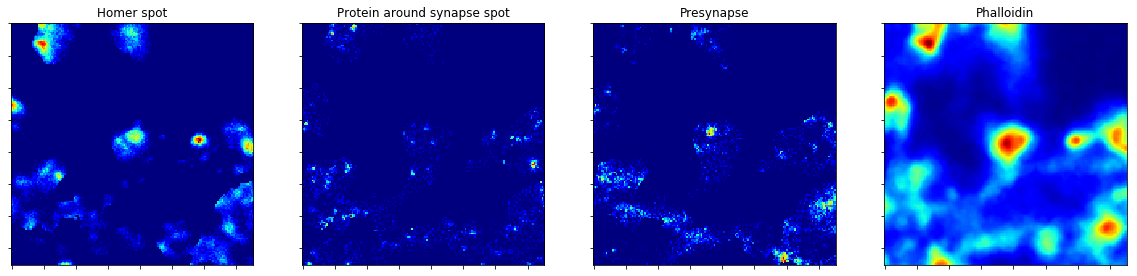

In [18]:
randomno=np.random.randint(1,len(df2))
fig=plt.figure(figsize=(20,20))
fig.add_subplot(141)
plt.imshow(df2["homer confocal, bg subtracted"][randomno],cmap='jet')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('Homer spot')
fig.add_subplot(142)
plt.imshow(df2["protein sted, bg subtracted"][randomno],cmap='jet')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('Protein around synapse spot')
fig.add_subplot(143)
plt.imshow(df2["presynapse sted, bg subtracted"][randomno],cmap='jet')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('Presynapse')
fig.add_subplot(144)
plt.imshow(df2["phalloidin spot aligned"][randomno],cmap='jet')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('Phalloidin')

In [19]:
dfbackup=deepcopy(df2)

## Remove outliers

In [27]:
vari="mean protein intensity sted under dio, bg subtracted"
df2=df2[df2[vari]<df2[vari].quantile(.99)]

In [20]:
protein="Calreticulin"

## Average images for each channel

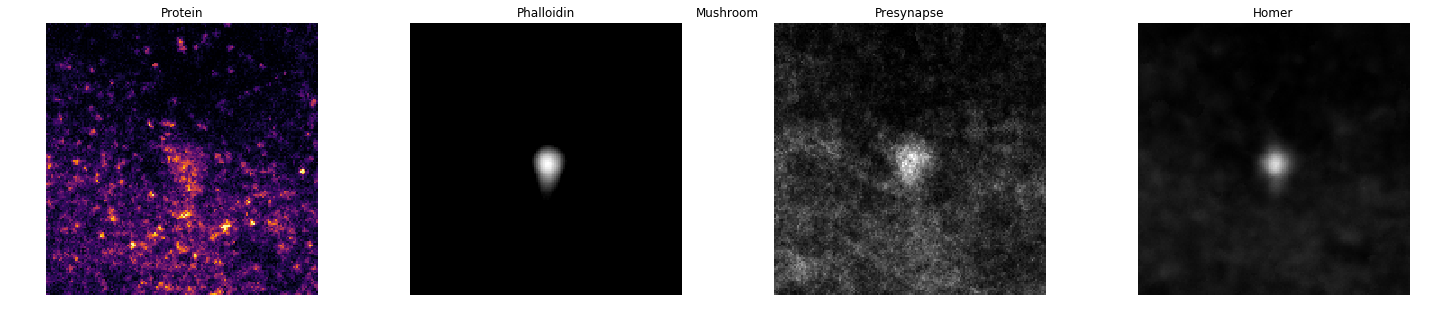

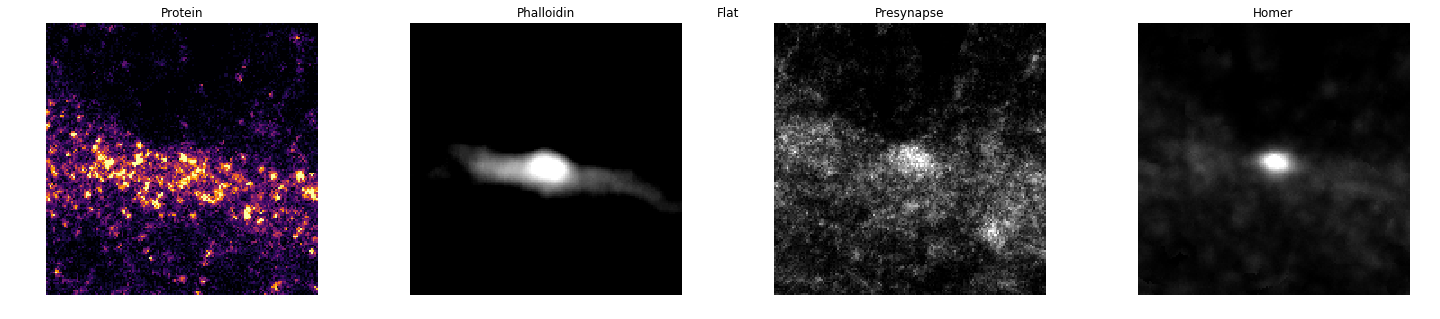

In [29]:
var="protein sted, bg subtracted under dio"
#var=vari
homer= 'homer confocal, bg subtracted under dio'
presynapse="presynapse sted, bg subtracted under dio"

for classi in ["Mushroom","Flat"]:
    df2protein_class=df2protein[df2protein["Classification"]==classi]
    fig=plt.figure(figsize=(25,5))
    plt.title(classi)
    plt.axis('off')
    #plt.title(str(i))
    fig.add_subplot(141)
    plt.title('Protein')
    plt.imshow(df2protein_class[var].mean()
               ,cmap='inferno',
               vmin=2*df2protein[var].mean().min(),
               vmax=0.9*np.max(df2protein[var].mean()))
    scalebar = ScaleBar(20, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    #plt.gca().add_artist(scalebar)
    plt.axis('off')
    data=df2protein_class[var].mean()
    im = Image.fromarray(data)
    #im.save(diri+'figure2_mushrooms_unblocked_sted.tiff')

    fig.add_subplot(142)
    plt.title('Phalloidin')
    plt.imshow(df2protein_class["phalloidin spot aligned"].mean()
               ,cmap='gray',
               vmin=1.0009*np.min(df2protein["phalloidin spot aligned"].mean()),
               vmax=.9999*np.max(df2protein["phalloidin spot aligned"].mean()))
    scalebar = ScaleBar(20, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    #plt.gca().add_artist(scalebar)
    plt.axis('off')
    data=df2protein_class["phalloidin spot aligned"].mean()
    im = Image.fromarray(data)
    #im.save(diri+'figure2_mushrooms_unblocked_dio.tiff')

    fig.add_subplot(143)
    plt.title('Presynapse')
    plt.imshow(df2protein_class[presynapse].mean()
               ,cmap='gray',
               vmin=1.0009*np.min(df2protein[presynapse].mean()),
               vmax=.9999*np.max(df2protein[presynapse].mean()))
    scalebar = ScaleBar(20, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    #plt.gca().add_artist(scalebar)
    plt.axis('off')
    data=df2protein_class["phalloidin spot aligned"].mean()
    im = Image.fromarray(data)
    
    
    fig.add_subplot(144)
    plt.title('Homer')
    plt.imshow(df2protein_class[homer].mean()
               ,cmap='gray',
               vmin=1.0009*np.min(df2protein[homer].mean()),
               vmax=.9999*np.max(df2protein[homer].mean()))
    scalebar = ScaleBar(20, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    #plt.gca().add_artist(scalebar)
    plt.axis('off')
    data=df2protein_class["phalloidin spot aligned"].mean()
    im = Image.fromarray(data)
    #im.save(diri+'figure2_mushrooms_unblocked_dio.tiff')

## Simple intensity correlations

### Mean intensity of protein in spines vs. mushrooms

In [33]:
vari="protein mean int norm2med"
df2protein=df2[df2["Protein"]==protein]

mush=df2protein[df2protein["Classification"]=="Mushroom"][vari].dropna().values
flat=df2protein[df2protein["Classification"]=="Flat"][vari].dropna().values

[stat,pval_1]=stats.ttest_ind(mush, flat)
print(pval_1)

0.08644615751159553


'x1, x2 = 0,1\ny= 3\nh=0.02\ncol=\'black\'\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)\nplt.text((x1+x2)*.5, y+h, "ns", ha=\'center\', va=\'bottom\', color=col,size=24, weight=\'bold\')\n\ndiri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"\nfig.savefig(diri+\'supp3_postsynpasesdio_mushstubby_alleps.svg\', bbox_inches=\'tight\', format=\'svg\')'

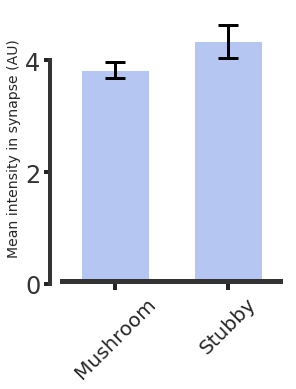

In [35]:
vari="protein mean int norm2med"
sns.set(font_scale=2.5)
sns.set_style("ticks")
sns.set_palette("Set2")
from matplotlib import ticker
plt.rcParams['font.sans-serif'] = 'Helvetica'

df2plot=df2protein

fig=plt.figure(figsize=(4,5))
palette={"All, mushroom": "#adadad",
         "All, flat": "#adadad",
         "New, dmso, mushroom":"#adadad",
         "New, dmso, flat":"#adadad",
        "New, bic, mushroom":"#abc2fc",
         "New, bic, flat":"#abc2fc"}

order=["Mushroom","Flat"]

g=sns.barplot(data=df2plot,y=vari,x="Classification"
            ,order=order,color="#abc2fc",ci=None)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
change_width(g, .6)

plt.errorbar(x=np.arange(0,len(order)),
             y=[df2plot[df2plot["Classification"]==condtype][vari].mean() for condtype in order],
             yerr=[df2plot[df2plot["Classification"]==condtype][vari].sem() for condtype in order],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,
             capthick=3,zorder=10,
            alpha=1)

#plt.ylim([0,1.5])
plt.axhline(0, color='#333333',alpha=1,linewidth=10)

scale_y=1/10
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
g.yaxis.set_major_formatter(ticks_y)
#plt.yticks([0,.5,1,1.5],color='#333333')
g.xaxis.set_tick_params(width=4)
g.yaxis.set_tick_params(width=4)
plt.rcParams['font.sans-serif'] = 'Helvetica'
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":False,"right":False}
sns.despine(ax=g,right=True,top=True,bottom=True,trim=trims,offset=offsets)
g.set_ylabel('Mean intensity in synapse (AU)',size=14)
g.set_xlabel('',color='#333333',alpha=.7)
plt.xticks(g.get_xticks(),['Mushroom','Stubby'],
           rotation=45,size=20)
plt.yticks(g.get_yticks(),size=24,color='#333333')
g.grid(False)


'''x1, x2 = 0,1
y= 3
h=0.02
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col,size=24, weight='bold')

diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'supp3_postsynpasesdio_mushstubby_alleps.svg', bbox_inches='tight', format='svg')'''

## Get more data

## Export tifs for icy spot finding

In [36]:
import shutil
for spot in range(0,len(df2)):
    print(str(spot+1)+' out of ' + str(len(df2)))
   
    data=df2["protein sted, bg subtracted under dio"][spot]
    data=np.asarray(data,dtype=np.uint16)
    im = Image.fromarray(data)
    im.save(df2["sted spot aligned filename"][spot]+'_rerunicy.tif')
    
    data=df2["homer confocal, bg subtracted under dio"][spot]
    data=np.asarray(data,dtype=np.uint16)
    im = Image.fromarray(data)
    im.save(df2["homer spot aligned filename"][spot]+'_rerunicy.tif')
    
    data=df2["presynapse sted, bg subtracted under dio"][spot]
    data=np.asarray(data,dtype=np.uint16)
    im = Image.fromarray(data)
    im.save(df2["presynapse spot aligned filename"][spot]+'_rerunicy.tif')

1 out of 526
2 out of 526
3 out of 526
4 out of 526
5 out of 526
6 out of 526
7 out of 526
8 out of 526
9 out of 526
10 out of 526
11 out of 526
12 out of 526
13 out of 526
14 out of 526
15 out of 526
16 out of 526
17 out of 526
18 out of 526
19 out of 526
20 out of 526
21 out of 526
22 out of 526
23 out of 526
24 out of 526
25 out of 526
26 out of 526
27 out of 526
28 out of 526
29 out of 526
30 out of 526
31 out of 526
32 out of 526
33 out of 526
34 out of 526
35 out of 526
36 out of 526
37 out of 526
38 out of 526
39 out of 526
40 out of 526
41 out of 526
42 out of 526
43 out of 526
44 out of 526
45 out of 526
46 out of 526
47 out of 526
48 out of 526
49 out of 526
50 out of 526
51 out of 526
52 out of 526
53 out of 526
54 out of 526
55 out of 526
56 out of 526
57 out of 526
58 out of 526
59 out of 526
60 out of 526
61 out of 526
62 out of 526
63 out of 526
64 out of 526
65 out of 526
66 out of 526
67 out of 526
68 out of 526
69 out of 526
70 out of 526
71 out of 526
72 out of 526
7

KeyError: 407

In [37]:
import scipy
from skimage.measure import label, regionprops
from PIL import Image



df2["mean dist to nearest neighbour - protein"]=np.nan
df2["mean dist protein to nearest homer"]=np.nan
df2["mean dist protein to nearest presynapse"]=np.nan

for spot in range(0,len(df2)):
    print(str(spot+1)+' out of ' + str(len(df2)))
    
    sted_image=df2["sted spot aligned"][spot]
    sted_icy_mask_name=df2["sted spot aligned filename"][spot]+'_rerunicy_wavelet_binary.tif'
    sted_icy_mask=np.asarray(Image.open(sted_icy_mask_name))>0
    
    homer_image=df2["homer spot aligned"][spot]
    homer_icy_mask_name=df2["homer spot aligned filename"][spot]+'_rerunicy_wavelet_binary.tif'
    homer_icy_mask=np.asarray(Image.open(homer_icy_mask_name))>0
    
    presynapse_image=df2["presynapse spot aligned"][spot]
    presynapse_icy_mask_name=df2["presynapse spot aligned filename"][spot]+'_rerunicy_wavelet_binary.tif'
    presynapse_icy_mask=np.asarray(Image.open(presynapse_icy_mask_name))>0
    
    #label masks
    labeled_sted=label(sted_icy_mask)
    labeled_homer=label(homer_icy_mask)
    labeled_presynapse=label(presynapse_icy_mask)
    #props
    regionprops_sted=regionprops(labeled_sted)
    regionprops_homer=regionprops(labeled_homer)
    regionprops_presynapse=regionprops(labeled_presynapse)
    #get centroids
    centroids_sted=[]
    centroid_homer=[]
    centroid_presynapse=[]
    for i in range(0,len(regionprops_sted)):
        centroids_sted.append(regionprops_sted[i]['centroid'])
    for i in range(0,len(regionprops_homer)):
        centroid_homer.append(regionprops_homer[i]['centroid'])  
    for i in range(0,len(regionprops_presynapse)):
        centroid_presynapse.append(regionprops_presynapse[i]['centroid'])  
    
    df2["mean dist protein to nearest homer"][spot]=scipy.spatial.distance.cdist(np.asarray(centroids_sted),centroid_homer,'euclidean').mean()
    df2["mean dist to nearest neighbour - protein"][spot]=scipy.spatial.distance.cdist(np.asarray(centroids_sted),centroids_sted,'euclidean').mean()
    df2["mean dist protein to nearest presynapse"][spot]=scipy.spatial.distance.cdist(np.asarray(centroids_sted),centroid_presynapse,'euclidean').mean()



1 out of 526


/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2 out of 526
3 out of 526
4 out of 526
5 out of 526
6 out of 526
7 out of 526
8 out of 526
9 out of 526
10 out of 526
11 out of 526
12 out of 526
13 out of 526
14 out of 526
15 out of 526
16 out of 526
17 out of 526
18 out of 526
19 out of 526
20 out of 526
21 out of 526
22 out of 526
23 out of 526
24 out of 526
25 out of 526
26 out of 526
27 out of 526
28 out of 526
29 out of 526
30 out of 526
31 out of 526
32 out of 526
33 out of 526
34 out of 526
35 out of 526
36 out of 526
37 out of 526
38 out of 526
39 out of 526
40 out of 526
41 out of 526
42 out of 526
43 out of 526
44 out of 526
45 out of 526
46 out of 526
47 out of 526
48 out of 526
49 out of 526
50 out of 526
51 out of 526
52 out of 526
53 out of 526
54 out of 526
55 out of 526
56 out of 526
57 out of 526
58 out of 526
59 out of 526
60 out of 526
61 out of 526
62 out of 526
63 out of 526
64 out of 526
65 out of 526
66 out of 526
67 out of 526
68 out of 526
69 out of 526
70 out of 526
71 out of 526
72 out of 526
73 out of 526


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV/SYT1/ERGIC/output_synapse_aligned_267_128_rerun.txt_rerunicy_wavelet_binary.tif'